# Electricity Usage Data Exploration

This notebook explores the electricity consumption dataset and performs initial analysis.

In [1]:
!pip install pandas numpy matplotlib seaborn statsmodels
!pip install ipython


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Loading egg at /usr/local/lib/python3.13/site-packages/envycontrol-3.5.1-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Loading egg at /usr/local/lib/python3.13/site-packages/envycontrol-3.5.1-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [5]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set plotting style
plt.style.use('bmh')
sns.set_palette('viridis')
print('Libraries loaded successfully')
# %matplotlib inline

Libraries loaded successfully


## Load the Dataset

In [8]:
# Load the dataset
df = pd.read_csv('../data/raw/electricity_consumption.csv')

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set timestamp as index
df = df.set_index('timestamp')

# Display the first few rows
df.head()

,consumption
timestamp,
2020-01-01 00:00:00,35.249810
2020-01-01 01:00:00,44.523711
2020-01-01 02:00:00,42.694793
2020-01-01 03:00:00,47.651441
2020-01-01 04:00:00,47.623875


## Basic Data Information

In [9]:
# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Time range: {df.index.min()} to {df.index.max()}")
print(f"Frequency: {df.index.to_series().diff().mode()[0]}")

# Display summary statistics
df.describe()

Dataset shape: (26281, 1)
Time range: 2020-01-01 00:00:00 to 2022-12-31 00:00:00
Frequency: 0 days 01:00:00


,consumption
count,26281.000000
mean,23.626838
std,13.230358
min,0.000000
25%,13.533584
50%,23.543685
75%,33.451708
max,60.215696


## Check for Missing Values

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
consumption    0
dtype: int64


## Time Series Visualization

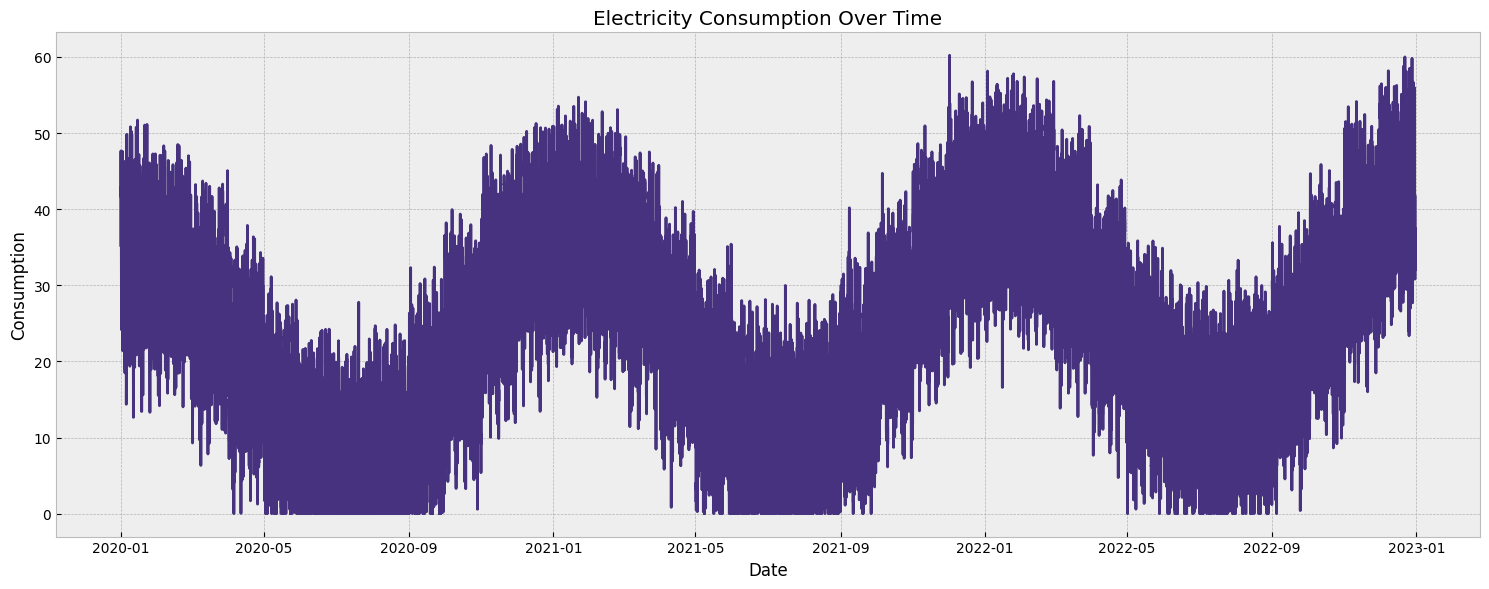

In [11]:
# Plot the time series
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['consumption'])
plt.title('Electricity Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

## Resampling for Different Time Periods

/tmp/ipykernel_162072/3015640113.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()


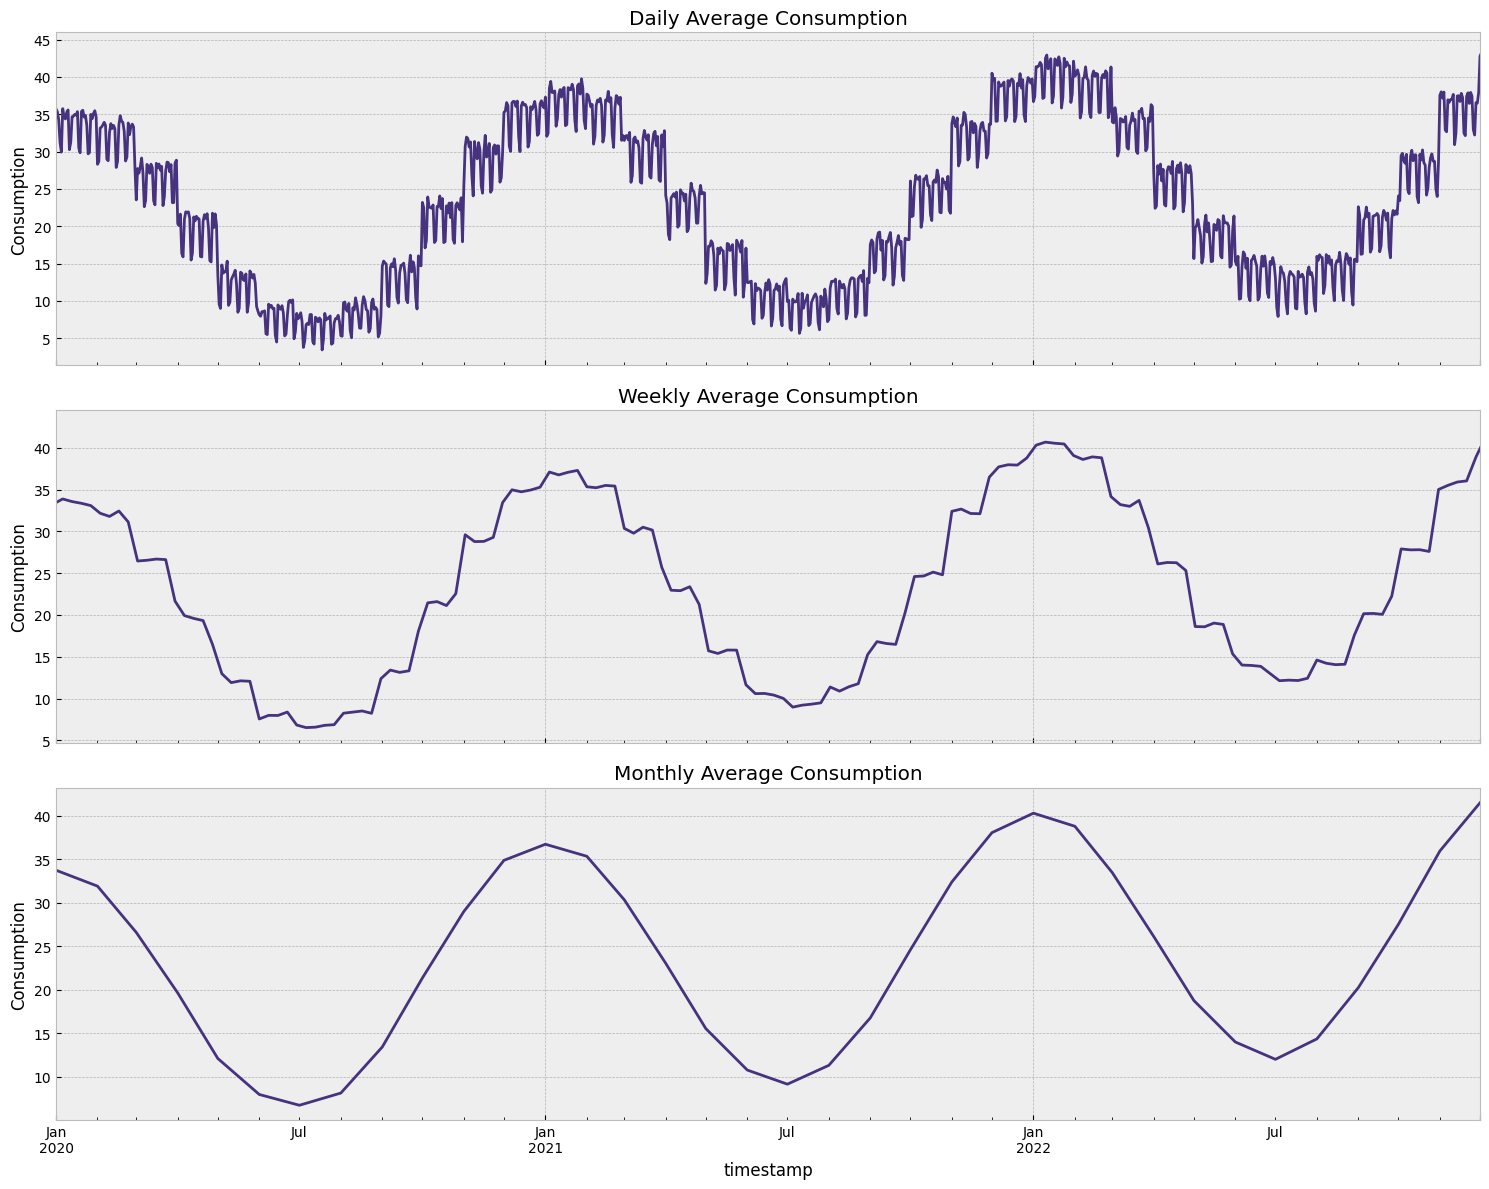

In [12]:
# Resample to daily, weekly, and monthly data
daily_data = df.resample('D').mean()
weekly_data = df.resample('W').mean()
monthly_data = df.resample('M').mean()

# Plot
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

daily_data['consumption'].plot(ax=axes[0], title='Daily Average Consumption')
weekly_data['consumption'].plot(ax=axes[1], title='Weekly Average Consumption')
monthly_data['consumption'].plot(ax=axes[2], title='Monthly Average Consumption')

for ax in axes:
    ax.set_ylabel('Consumption')
    ax.grid(True)

plt.tight_layout()
plt.show()

## Seasonal Patterns

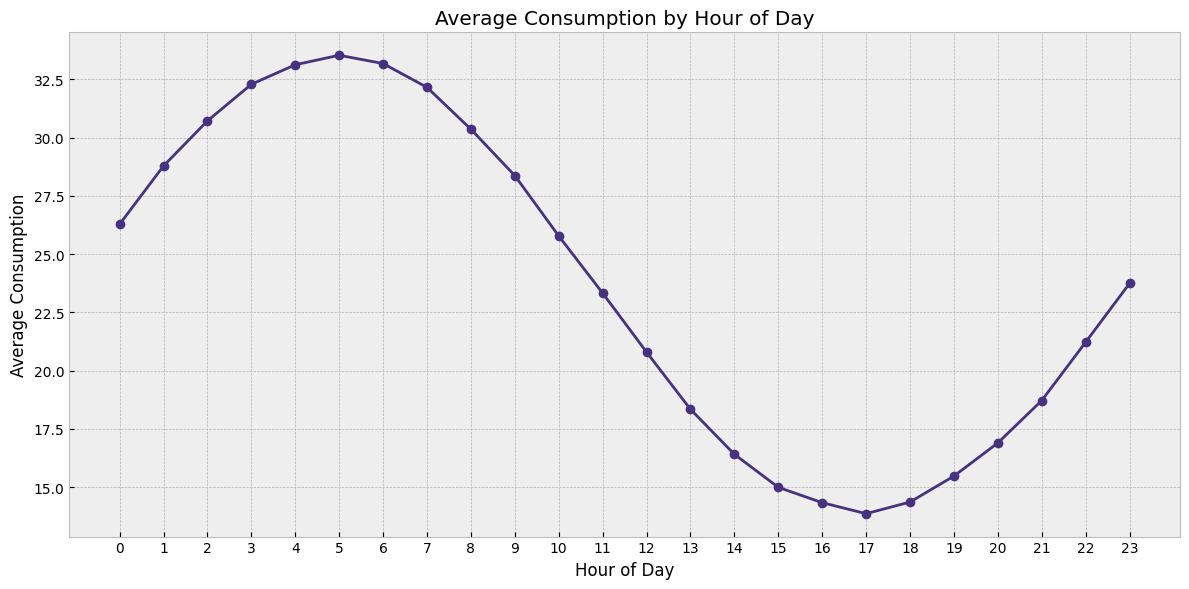

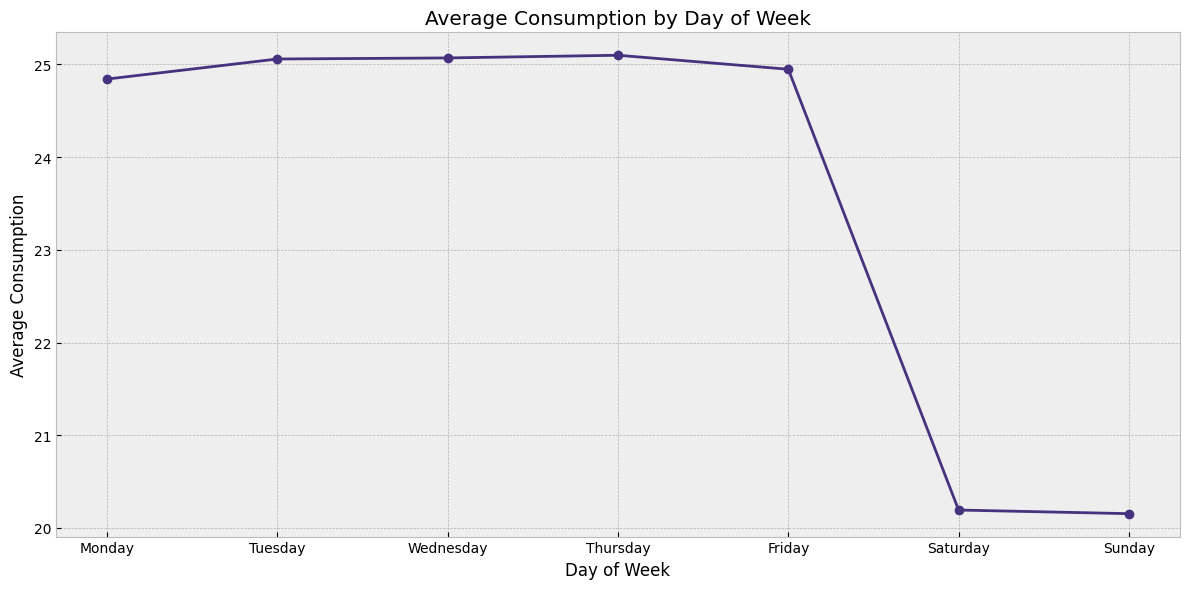

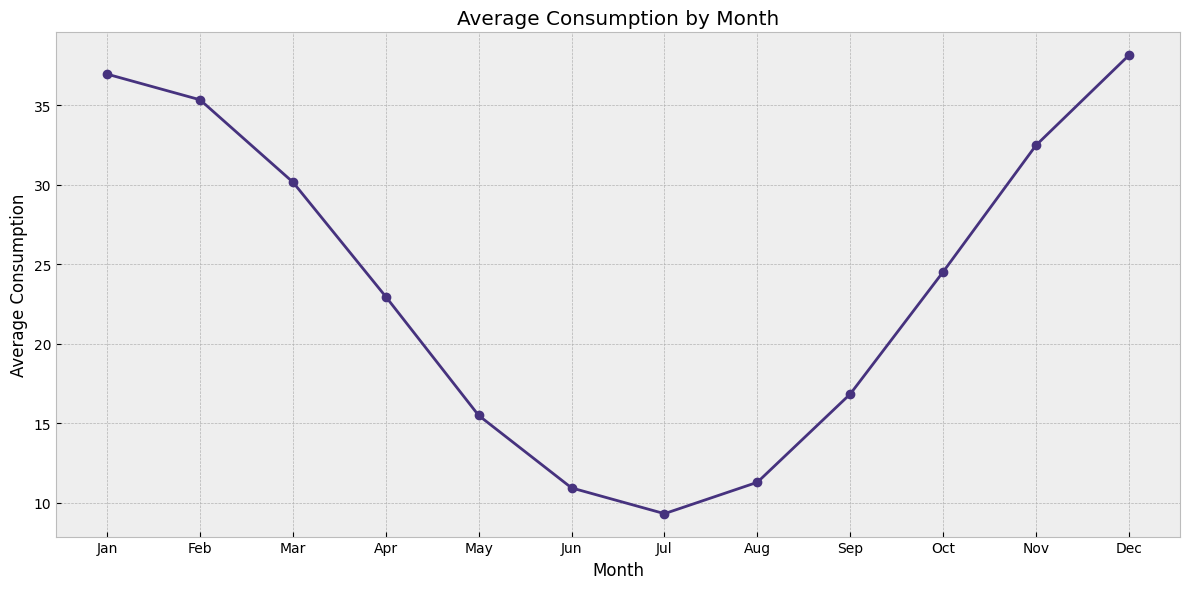

In [13]:
# Daily patterns
hourly_avg = df.groupby(df.index.hour).mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg['consumption'], marker='o')
plt.title('Average Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Consumption')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

# Weekly patterns
daily_avg = df.groupby(df.index.dayofweek).mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg['consumption'], marker='o')
plt.title('Average Consumption by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Consumption')
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Monthly patterns
monthly_avg = df.groupby(df.index.month).mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg['consumption'], marker='o')
plt.title('Average Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Average Consumption')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

## Time Series Decomposition

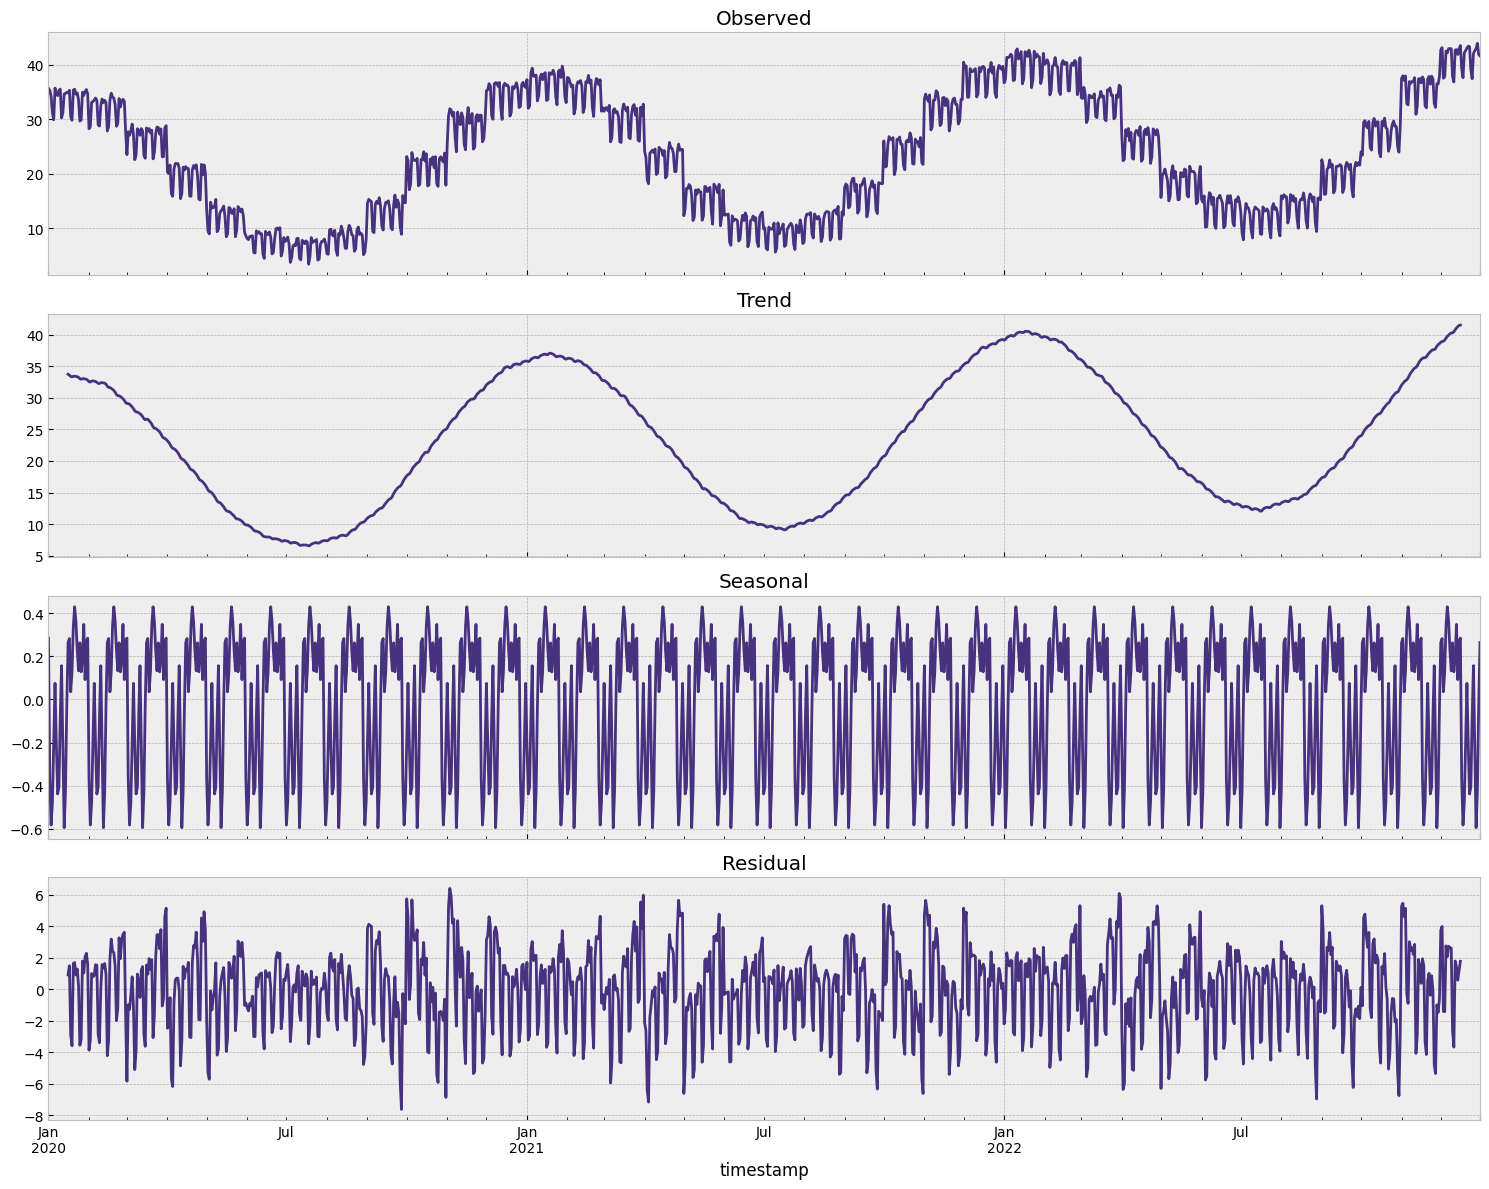

In [14]:
# Resample to daily data for decomposition
daily_data = df['consumption'].resample('D').mean()

# Decompose the time series
decomposition = seasonal_decompose(daily_data, model='additive', period=30)

# Plot
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residual')

plt.tight_layout()
plt.show()

## Autocorrelation and Partial Autocorrelation

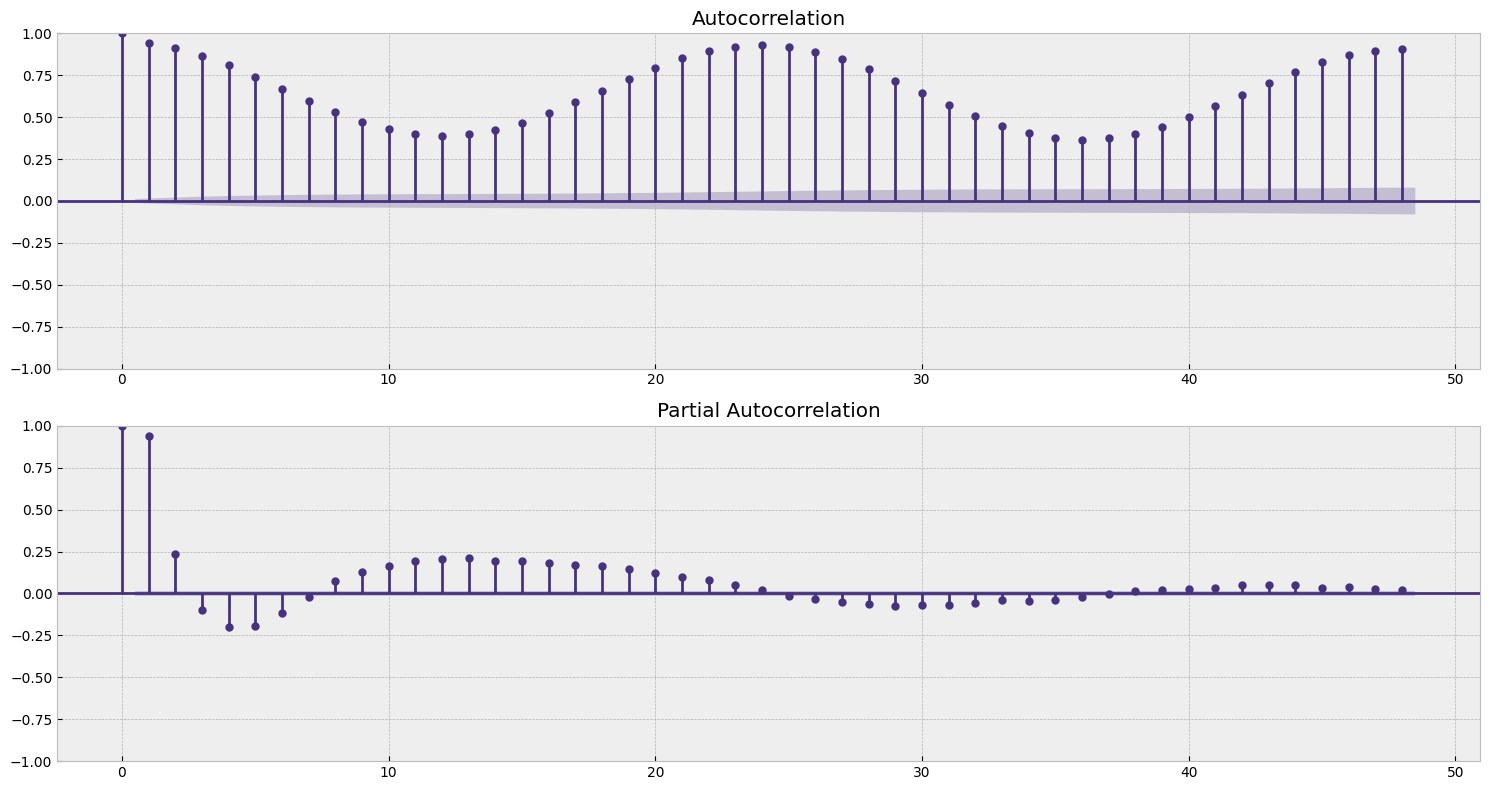

In [15]:
# ACF and PACF plots
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

plot_acf(df['consumption'], lags=48, ax=axes[0])
plot_pacf(df['consumption'], lags=48, ax=axes[1])

plt.tight_layout()
plt.show()

## Feature Engineering

In [16]:
# Add time-based features
df_features = df.copy()

# Time-based features
df_features['hour'] = df_features.index.hour
df_features['dayofweek'] = df_features.index.dayofweek
df_features['month'] = df_features.index.month
df_features['year'] = df_features.index.year
df_features['dayofyear'] = df_features.index.dayofyear
df_features['quarter'] = df_features.index.quarter

# Lag features
df_features['consumption_lag_1d'] = df_features['consumption'].shift(24)
df_features['consumption_lag_1w'] = df_features['consumption'].shift(168)

# Rolling statistics
df_features['consumption_rolling_mean_24h'] = df_features['consumption'].rolling(window=24).mean()
df_features['consumption_rolling_std_24h'] = df_features['consumption'].rolling(window=24).std()

# Drop rows with NaN values
df_features = df_features.dropna()

# Display the first few rows
df_features.head()

,consumption,hour,dayofweek,month,year,dayofyear,quarter,consumption_lag_1d,consumption_lag_1w,consumption_rolling_mean_24h,consumption_rolling_std_24h
timestamp,,,,,,,,,,,
2020-01-08 00:00:00,35.386277,0,2,1,2020,8,1,39.212918,35.249810,34.494278,8.028916
2020-01-08 01:00:00,35.442795,1,2,1,2020,8,1,42.842481,44.523711,34.185958,7.834111
2020-01-08 02:00:00,42.258228,2,2,1,2020,8,1,45.101166,42.694793,34.067502,7.681907
2020-01-08 03:00:00,46.686924,3,2,1,2020,8,1,41.677892,47.651441,34.276212,7.960651
2020-01-08 04:00:00,42.378415,4,2,1,2020,8,1,46.501344,47.623875,34.104423,7.726405


## Correlation Analysis

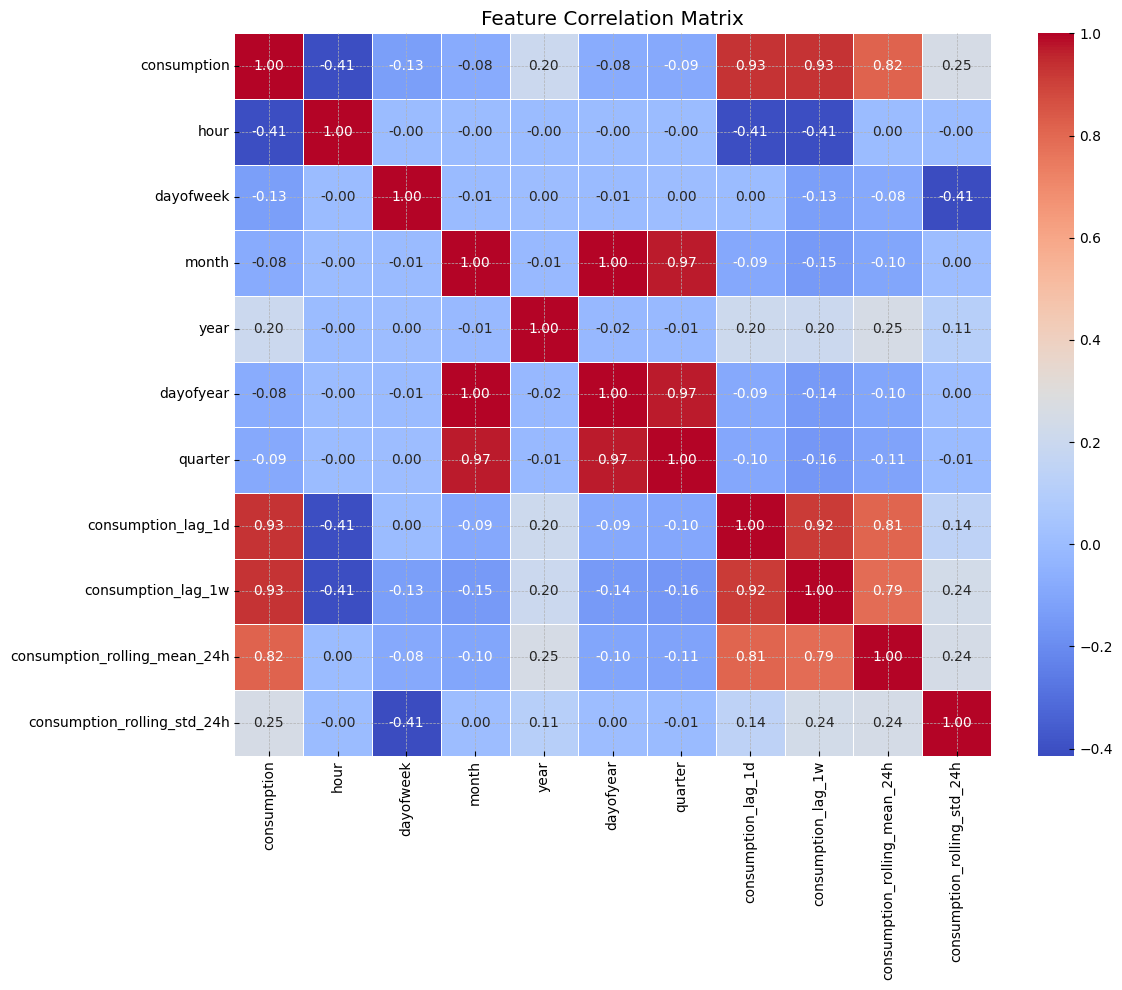

In [17]:
# Calculate correlation matrix
correlation = df_features.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

## Conclusion

This exploratory analysis has revealed several patterns in the electricity consumption data:

1. There are clear daily patterns with higher consumption during daytime hours.
2. Weekly patterns show lower consumption on weekends.
3. Seasonal patterns indicate higher consumption in winter and summer months.
4. The time series decomposition confirms these seasonal patterns and shows an overall trend.

These insights will guide our feature engineering and model selection for forecasting electricity usage.